## Airbnb Seattle Dataset - Darlington_Aibangbee (Data_Science project)
### About Dataset
#### Context
Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

#### Content
The following Airbnb activity is included in this Seattle dataset:

- Listings: including full descriptions and average review score
- Reviews: including unique id for each reviewer and detailed comments
- Calendar: including listing id and the price and availability for that day

Acknowledgement
This dataset is part of Airbnb Inside, and the original source can be found here.

Questions to Answer:

- What are the types of properties available in seattle's listings? What are thier prices on average?
- What are the neighbourhood trends? What neighbourhoods have the most expensive and cheapest listings?
- What are the busiest times of the year to visit Seattle? By how much do prices spike?
- Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?
- What are the important features that predict price

In [ ]:
## Loading Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score
import seaborn as sns
%matplotlib inline
import random

In [ ]:
#reading in all csv files to dataframes
listing_df = pd.read_csv('listings.csv')
calendar_df = pd.read_csv('calendar.csv')
reviews_df = pd.read_csv('reviews.csv')

In [ ]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [ ]:
listing_df.head(4)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN


In [ ]:
#listing dataframe information
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [ ]:
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [ ]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [ ]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


## Data Cleaning and Preparation

#### Cleaning the Listing dataframe listing_df

In [ ]:
## Showing columns with missing values 
listing_df.isna().any()[listing_df.isna().any() == True]

summary                        True
space                          True
neighborhood_overview          True
notes                          True
transit                        True
thumbnail_url                  True
medium_url                     True
xl_picture_url                 True
host_name                      True
host_since                     True
host_location                  True
host_about                     True
host_response_time             True
host_response_rate             True
host_acceptance_rate           True
host_is_superhost              True
host_thumbnail_url             True
host_picture_url               True
host_neighbourhood             True
host_listings_count            True
host_total_listings_count      True
host_has_profile_pic           True
host_identity_verified         True
neighbourhood                  True
zipcode                        True
property_type                  True
bathrooms                      True
bedrooms                    

In [ ]:
#Top missing features
listing_df.isnull().mean().sort_values(ascending = False).nlargest(10)

license                  1.000000
square_feet              0.974594
monthly_price            0.602672
security_deposit         0.511262
weekly_price             0.473808
notes                    0.420639
neighborhood_overview    0.270299
cleaning_fee             0.269775
transit                  0.244631
host_about               0.224987
dtype: float64

In [ ]:
#Proportion of missing values in each feature of the listings dataframe
prop_missing = listing_df.isnull().mean()
prop_missing_40 = prop_missing[prop_missing > .4]
missing_over40percent = prop_missing_40.index.tolist()

In [ ]:
listing_df.drop(missing_over40percent, axis = 1, inplace = True)

In [ ]:
listing_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
 

In [ ]:
listing_df['city'] = listing_df['market']

In [ ]:
listing_df['city'].value_counts()

Seattle    3818
Name: city, dtype: int64

In [ ]:
# Market is the same as city and is not needed
listing_df.drop('market', axis = 1, inplace =True)

# The neighbourhood column is incomplete
listing_df.drop('neighbourhood', axis = 1, inplace = True)

In [ ]:
listing_df.rename(columns = {'neighbourhood_cleansed':'neighbourhood', 'neighbourhood_group_cleansed':'neighbourhood_group'}, inplace = True)

- I dropped the market column  which is redundant seeing that we already assigned it to the city column as the entire datasets contain entries for only Seattle

- The neighbourhood information is contained in 2 different columns. the original **neighbourhood** column is incomplete while the '**neighbourhood_cleansed** column contains the complete neighbourhood information. So we drop the **'neighbourhood'** column and rename the **'neighbourhood_cleansed'** as neighbourhood

- The **neighbourhood_group_cleansed** column is also renamed to '**neighbourhood_group**'

In [ ]:
# A function that takes the prices remove the $ symbol and sets the price to a float datatype that is usable
def clean_price(df):
    df['price'] = df.price.astype(str)
    df['price'] = df['price'].str.replace(pat= r'[,$]', repl = '', regex = True).astype(float)
    return df['price'].head()

In [ ]:
# Cleaning price
clean_price(listing_df)

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64

In [ ]:
listing_df.price

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

In [ ]:
# Creating a list of features that should be type Boolean
Bool_feat = ['has_availability', 'instant_bookable', 'requires_license', 'require_guest_profile_picture', 'require_guest_phone_verification']

In [ ]:
for col in Bool_feat:
    listing_df[col] = listing_df[col].map({'f': False, 't': True});

In [ ]:
listing_df[Bool_feat]

,has_availability,instant_bookable,requires_license,require_guest_profile_picture,require_guest_phone_verification
0,True,False,False,False,False
1,True,False,False,True,True
2,True,False,False,False,False
3,True,False,False,False,False
4,True,False,False,False,False
...,...,...,...,...,...
3813,True,False,False,False,False
3814,True,False,False,False,False
3815,True,False,False,False,False
3816,True,False,False,False,False


In [ ]:
# Cleaning the amenities dataframe to be used as categorical type variable to get dummy variables for price prediction model
listing_df['amenities'] = listing_df['amenities'].apply(lambda x: x.replace(' ', '_'))
listing_df['amenities'] = listing_df['amenities'].apply(lambda x: x.replace('"', ''))

In [ ]:
u = listing_df['amenities'].str.strip(',{}')

In [ ]:
u

0       TV,Cable_TV,Internet,Wireless_Internet,Air_Con...
1       TV,Internet,Wireless_Internet,Kitchen,Free_Par...
2       TV,Cable_TV,Internet,Wireless_Internet,Air_Con...
3       Internet,Wireless_Internet,Kitchen,Indoor_Fire...
4       TV,Cable_TV,Internet,Wireless_Internet,Kitchen...
                              ...                        
3813    TV,Cable_TV,Internet,Wireless_Internet,Air_Con...
3814    TV,Cable_TV,Internet,Wireless_Internet,Kitchen...
3815    Cable_TV,Wireless_Internet,Kitchen,Free_Parkin...
3816    TV,Wireless_Internet,Kitchen,Free_Parking_on_P...
3817    TV,Cable_TV,Internet,Wireless_Internet,Kitchen...
Name: amenities, Length: 3818, dtype: object

In [ ]:
listing_df['amenities'] = u

In [ ]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 84 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  transit                           2884 non-null   object 
 11  thumbnail_url                     3498 non-null   object 
 12  medium

- The listing_df dataframe is usable for the exploration we need to do now. Further cleaning and removal of null entries will be done when building the price prediction model

### Cleaning, Wrangling the Calendar Dataframe

In [ ]:
calendar_df.head(80)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
75,241032,2016-03-19,t,$85.00
76,241032,2016-03-20,t,$85.00
77,241032,2016-03-21,t,$85.00
78,241032,2016-03-22,t,$85.00


In [ ]:
calendar_df.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [ ]:
#Cleaning the price column and setting to type float using previously defiened clean price function
clean_price(calendar_df)
calendar_df.dtypes

listing_id      int64
date           object
available      object
price         float64
dtype: object

In [ ]:
calendar_df['available'].head()

0    t
1    t
2    f
3    f
4    f
Name: available, dtype: object

In [ ]:
# Converting the 'available' feature to type boolean
calendar_df['available'] = calendar_df['available'].map({'f': False, 't': True})
calendar_df.dtypes

listing_id      int64
date           object
available        bool
price         float64
dtype: object

In [ ]:
#Checking the 'available' feature
calendar_df.available.head()

0     True
1     True
2    False
3    False
4    False
Name: available, dtype: bool

In [ ]:
#setting the date column to type datetime
calendar_df['date'] = pd.to_datetime(calendar_df['date'])

In [ ]:
calendar_df.dtypes

listing_id             int64
date          datetime64[ns]
available               bool
price                float64
dtype: object

In [ ]:
# https://github.com/softhints/Pandas-Tutorials/blob/master/datetime/1.extract-month-and-year-datetime-column-in-pandas.ipynb
# Getting the Period Month for each date entry in the date column.
calendar_df['month_period'] = calendar_df['date'].dt.to_period('M')

In [ ]:
calendar_df.dtypes

listing_id               int64
date            datetime64[ns]
available                 bool
price                  float64
month_period         period[M]
dtype: object

### Exploring and Answering questions with the Listings Dataframe

##### The most common property type in airbnb listings

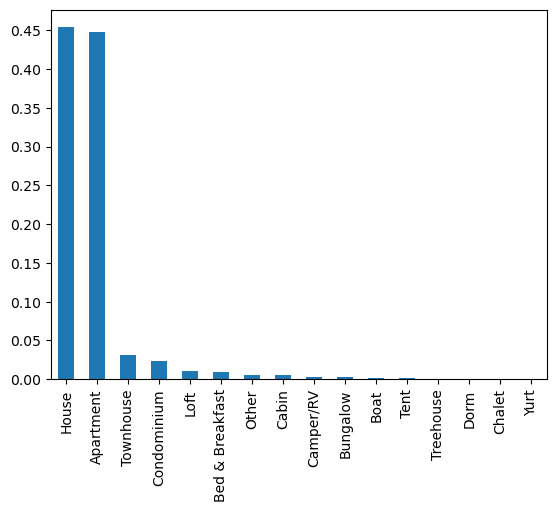

In [ ]:
#Exploring property type by their proportions in airbnb listings
prop_type_prop = listing_df['property_type'].value_counts()/listing_df.shape[0]
prop_type_prop.plot(kind = 'bar')
plt.yticks(np.arange(0, .5, .05));

<Axes: xlabel='property_type'>

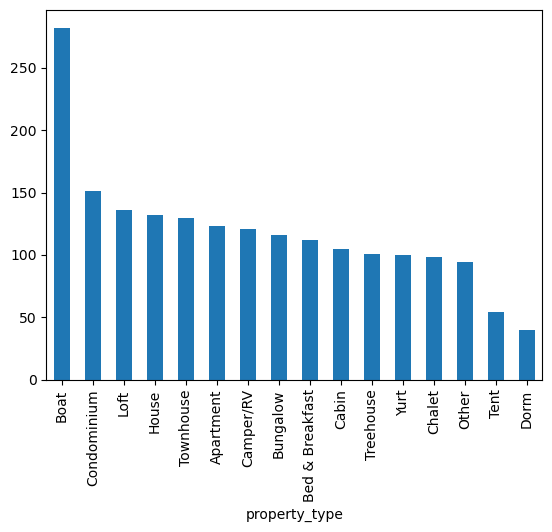

In [ ]:
# A plot showing Average Price by property type
listing_df.groupby('property_type')['price'].mean().sort_values(ascending = False).plot(kind = 'bar')

- Here we see that as expected **Boats** have the highest prices on average (since it is practically luxury), we also have **condomiums, lofts, houses** on the high sides.
- On the low average price we have **Yurts, Chalets, Tents and Dorms**

##### Neighbourhoods Trends

<Axes: >

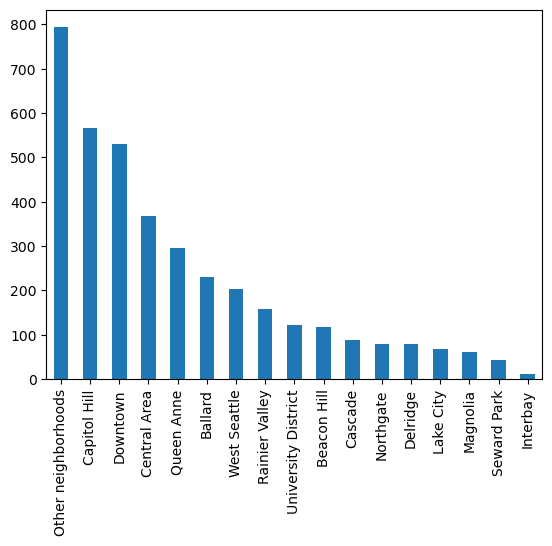

In [ ]:
# Listings by neighbourhood
listing_df.neighbourhood_group.value_counts().plot(kind = 'bar')

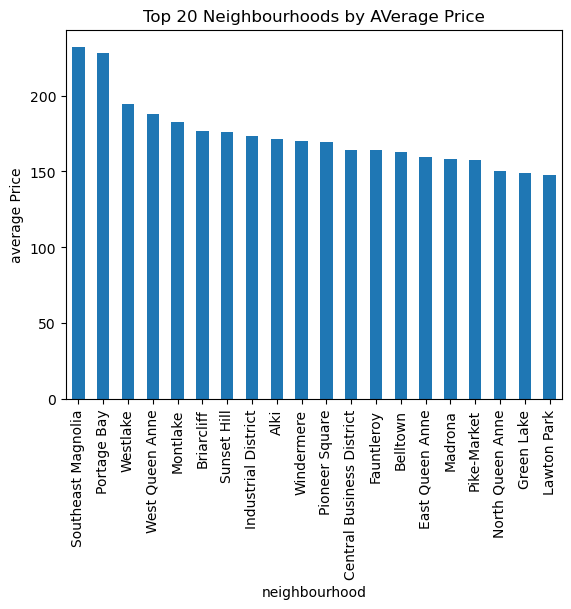

In [ ]:
# Top 20 Neighbourhoods in seattle sorted by the highest price on average
listing_df.groupby('neighbourhood')['price'].mean().nlargest(20).plot(kind = 'bar')
plt.title('Top 20 Neighbourhoods by AVerage Price')
plt.ylabel('average Price');

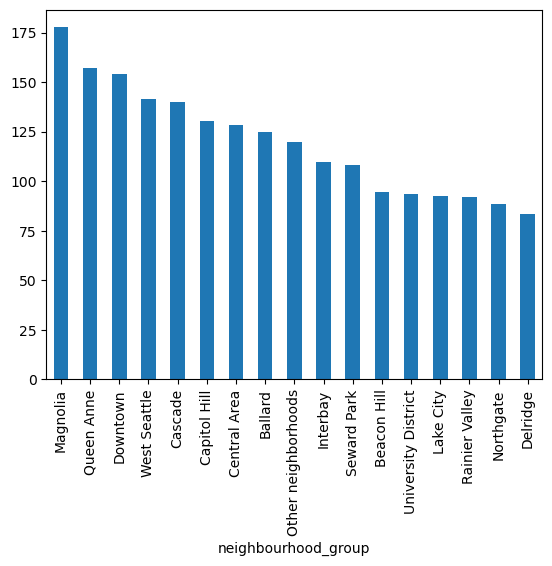

In [ ]:
# plot of average price by neighbourhood_group
listing_df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending = False).plot(kind = 'bar');

In [ ]:
#Lowest listing prices
listing_df.groupby('neighbourhood')['price'].min().nsmallest(10)

neighbourhood
West Queen Anne        20.0
Stevens                22.0
Adams                  25.0
Broadway               25.0
Columbia City          25.0
Greenwood              25.0
Industrial District    25.0
Crown Hill             28.0
Ravenna                28.0
University District    28.0
Name: price, dtype: float64

In [ ]:
# Highest listing prices you can get
listing_df.groupby('neighbourhood')['price'].max().nlargest(10)

neighbourhood
Roosevelt             1000.0
Belltown               999.0
West Queen Anne        975.0
Southeast Magnolia     950.0
Westlake               775.0
Montlake               750.0
Portage Bay            750.0
East Queen Anne        749.0
Wallingford            680.0
Broadway               673.0
Name: price, dtype: float64

The neighbourhood-group with the highest price on the average is the **Magnolia Neighbourhood.** A search on google shows that. Magnolia an affluent residential neighbourhood with close proximity to seattle's top attractions is the second largest neighborhood of Seattle, Washington by area. This and the fact that it is one of the neighbourhood group with the lowest number of listings (**meaning high brow area, with low units available**) may explain why it is the highest on average.
- The most expensive neighbourhood_groups by average price are: **Magnolia, Queen Anne, Downtown, West_Seattle and Cascade**
- The least expensive neighbourhood_groups on average are: **University District, Lake City, Rainier Valley, Northgate, Delridge**


> 20 Most expensive neighbourhoods in order of decreasing average prices: **'Southeast Magnolia'** (which is in the magnolia Neighbourhood group), **'Portage Bay',
 'Westlake',
 'West Queen Anne',
 'Montlake',
 'Briarcliff',
 'Sunset Hill',
 'Industrial District',
 'Alki',
 'Windermere',
 'Pioneer Square',
 'Central Business District',
 'Fauntleroy',
 'Belltown',
 'East Queen Anne',
 'Madrona',
 'Pike-Market',
 'North Queen Anne',
 'Green Lake',
 'Lawton Park'**

### What are the Busiest times of the year to visit seattle?

<Axes: title={'center': 'Rooms Available'}, xlabel='month_period', ylabel='count'>

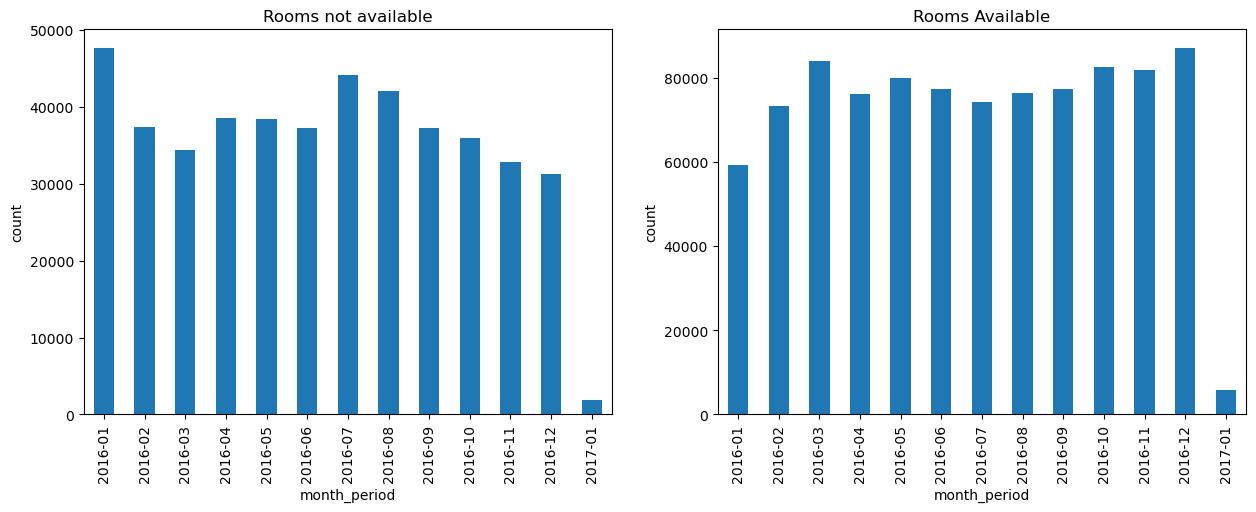

In [ ]:
# What are the busiest times of the year to visit Seattle? By how much do prices spike?
plt.figure(figsize = (15, 5))

#count of rooms not available(Availability = False) by month
plt.subplot(1, 2, 1)
plt.title('Rooms not available')
plt.xlabel('Months')
plt.ylabel('count')
calendar_df[calendar_df['available'] == False].groupby('month_period')['available'].count().plot(kind = 'bar')

#count of rooms not available by month(Availability = True)
plt.subplot(1, 2, 2)
plt.title('Rooms Available')
plt.xlabel('Months')
plt.ylabel('count')
calendar_df[calendar_df['available'] == True].groupby('month_period')['available'].count().plot(kind = 'bar')

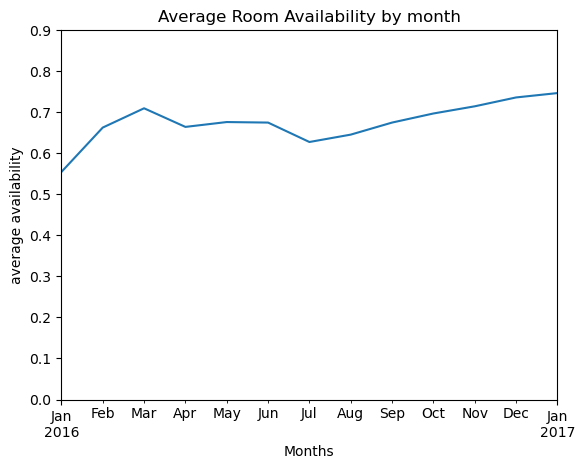

In [ ]:
calendar_df.groupby('month_period')['available'].mean().plot(kind = 'line')
plt.title('Average Room Availability by month')
plt.xlabel('Months')
plt.ylabel('average availability')
plt.yticks(np.arange(0, 1, .1));

##### Observation:
- Here, we see that the number of **available rooms** are mostly in the **lowest** towards the middle of the year around the summer holiday periods (between **June** and **August**). This is most likely due to high demands around these periods.
- We see an increase in availability in the first quarter of the year, a tendency for availability to decrease mid year around summer and a spike again around the end of year. 
> This is probably because people tend to go on holidays around the december periods and mostly have their homes available and for the first quarter the most likely reason is because the demand for airbnb listings around that period is low unlike in the summer when everyone wants to go on summer holidays and require those listings.

> **WE will further explore the price trends around these period**

In [ ]:
calendar_df['day'] = calendar_df['date'].dt.day_name()

In [ ]:
#We fill in the missing prices with the mean of prices for each month
calendar_df['price'] = calendar_df.groupby('month_period')['price'].transform(lambda x: x.fillna(x.mean()))

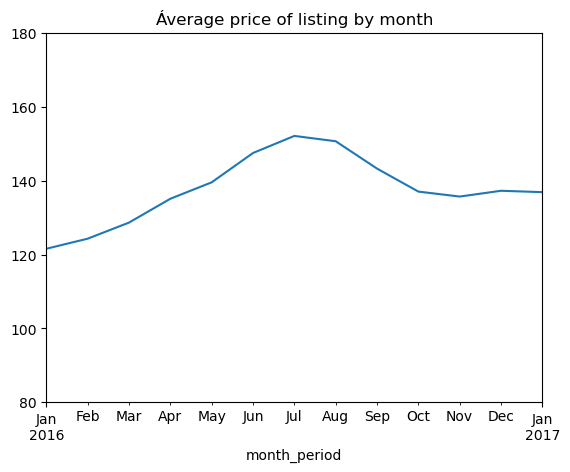

In [ ]:
calendar_df.groupby('month_period')['price'].mean().plot(kind = 'line')
plt.yticks(np.arange(80, 200, 20))
plt.title('Áverage price of listing by month');

In [ ]:
calendar_df.head()

,listing_id,date,available,price,month_period,day
0,241032,2016-01-04,True,85.000000,2016-01,Monday
1,241032,2016-01-05,True,85.000000,2016-01,Tuesday
2,241032,2016-01-06,False,121.568409,2016-01,Wednesday
3,241032,2016-01-07,False,121.568409,2016-01,Thursday
4,241032,2016-01-08,False,121.568409,2016-01,Friday


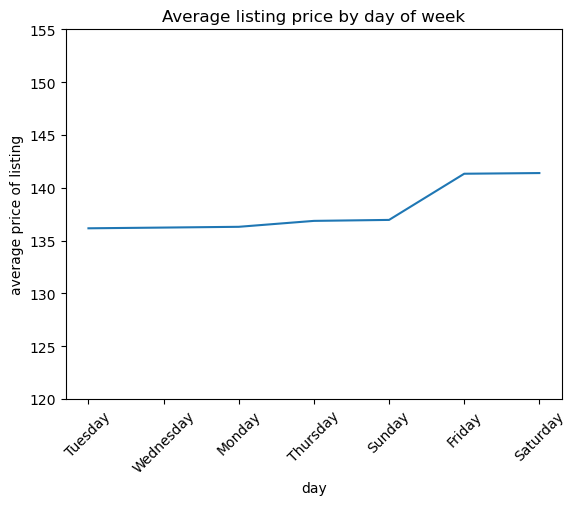

In [ ]:
# plot of average listing price vs day  of week
calendar_df.groupby('day')['price'].mean().sort_values().plot(kind = 'line')
plt.yticks(np.arange(120, 160, 5))
plt.xticks(rotation = 45)
plt.title('Average listing price by day of week')
plt.ylabel('average price of listing');

In [ ]:
calendar_df

,listing_id,date,available,price,month_period,day
0,241032,2016-01-04,True,85.000000,2016-01,Monday
1,241032,2016-01-05,True,85.000000,2016-01,Tuesday
2,241032,2016-01-06,False,121.568409,2016-01,Wednesday
3,241032,2016-01-07,False,121.568409,2016-01,Thursday
4,241032,2016-01-08,False,121.568409,2016-01,Friday
...,...,...,...,...,...,...
1393565,10208623,2016-12-29,False,137.251835,2016-12,Thursday
1393566,10208623,2016-12-30,False,137.251835,2016-12,Friday
1393567,10208623,2016-12-31,False,137.251835,2016-12,Saturday
1393568,10208623,2017-01-01,False,136.882590,2017-01,Sunday


##### Observation:
- Here, we see that indirectly proportional to average availability, on the average, prices are higher towards the middle of the year around the summer holiday periods (between **June** and **August**) and tend to drop after august.
- We also see that on the average listing prices are higher on the weekends (Friday and Saturday) and tend to drop and even out on week days and on sunday


##### We can further explore the average price of listings in neighbourhood groups around the summer period to see what areas to visit if on a budget to get  the cheapest prices in the summer.

In [ ]:
# merging the listing_df dataframe and calendar_df dataframe to get date column added to the listing dataframe
merged = listing_df.merge(calendar_df, left_on='id', right_on='listing_id')

In [ ]:
# Getting a subset(summer months) dataframe
summer = merged.loc[merged['month_period'].dt.month.isin([6, 7, 8])][['id', 'neighbourhood', 'neighbourhood_group', 'price_y', 'month_period']]

In [ ]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351256 entries, 149 to 1393445
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype    
---  ------               --------------   -----    
 0   id                   351256 non-null  int64    
 1   neighbourhood        351256 non-null  object   
 2   neighbourhood_group  351256 non-null  object   
 3   price_y              351256 non-null  float64  
 4   month_period         351256 non-null  period[M]
dtypes: float64(1), int64(1), object(2), period[M](1)
memory usage: 16.1+ MB


Text(0.5, 1.0, 'Costliest Neighbourhoodgroups on average in summer')

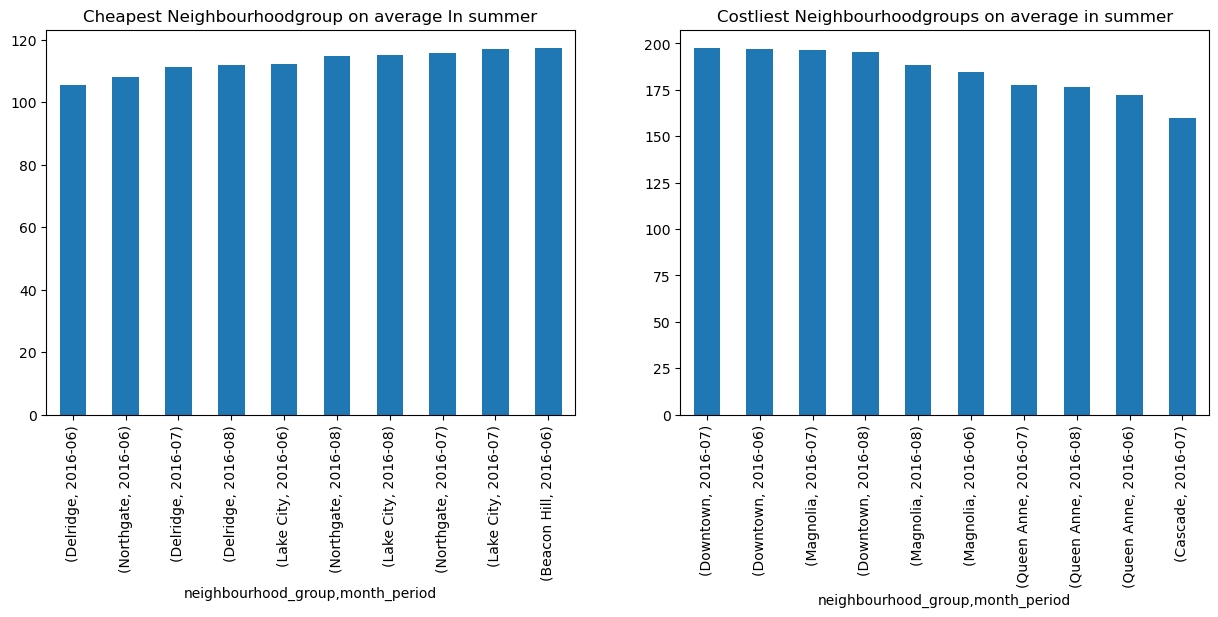

In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
summer.groupby(['neighbourhood_group', 'month_period'])[ 'price_y'].mean().sort_values().nsmallest(10).plot(kind = 'bar')
plt.title('Cheapest Neighbourhoodgroup on average In summer')

#
plt.subplot(1,2, 2)
summer.groupby(['neighbourhood_group', 'month_period'])[ 'price_y'].mean().sort_values().nlargest(10).plot(kind = 'bar')
plt.title('Costliest Neighbourhoodgroups on average in summer')

- We see Neighbourhood groups like **Delridge, Northgate, Lake City and Beacon Hill** under \$120 per night during the summer period
- We also see Neighbourhood groups like **Downtown, Magnolia, Queen Anne, Cascade** doing a minimum of over \\$150 on average and going as high as \$200 dollars per night on average

> **Note:** We can get Neighbourhoods that go as low as 20dollars in areas like Queen Anne and Downtown and other highbrow areas and get costly listings around low brow neighbourhoods too.

### Cleaning and Wrangling the Reviews Dataframe

In [ ]:
reviews_df

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicación, cerca de todo lo atractivo del..."
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si..."


In [ ]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [ ]:
reviews_df.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [ ]:
reviews_df['date'] = pd.to_datetime(reviews_df['date'])

In [ ]:
reviews_df.dtypes

listing_id                int64
id                        int64
date             datetime64[ns]
reviewer_id               int64
reviewer_name            object
comments                 object
dtype: object

In [ ]:
reviews_df['month_period'] = reviews_df['date'].dt.to_period('M')

In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     84849 non-null  int64         
 1   id             84849 non-null  int64         
 2   date           84849 non-null  datetime64[ns]
 3   reviewer_id    84849 non-null  int64         
 4   reviewer_name  84849 non-null  object        
 5   comments       84831 non-null  object        
 6   month_period   84849 non-null  period[M]     
dtypes: datetime64[ns](1), int64(3), object(2), period[M](1)
memory usage: 4.5+ MB


In [ ]:
reviews_df.month_period.value_counts()

2015-08    7963
2015-09    6985
2015-07    6580
2015-06    5549
2015-10    5536
           ... 
2010-02       3
2009-09       2
2009-06       2
2009-08       1
2009-07       1
Freq: M, Name: month_period, Length: 79, dtype: int64

In [ ]:
reviews_df['year_period'] = reviews_df['date'].dt.year

##### Trend in number of listings by the years

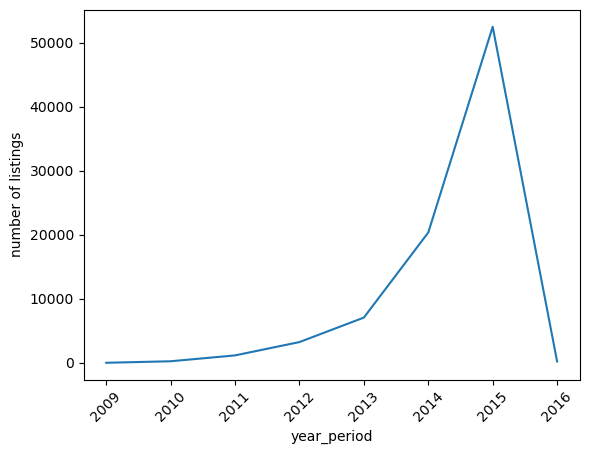

In [ ]:
reviews_df.groupby('year_period')['id'].count().plot(kind = 'line')
plt.xticks(rotation = 45)
plt.ylabel('number of listings');

In [ ]:
reviews_df['date'].max()

Timestamp('2016-01-03 00:00:00')

- We see a general upward trend in the number of airbnb listings over the years with occasional dips
- the graph seems to dip in the end but that is only because the data stops on the 3rd day of january 2016

### Modelling for Price Predition

Text(0, 0.5, 'correlation')

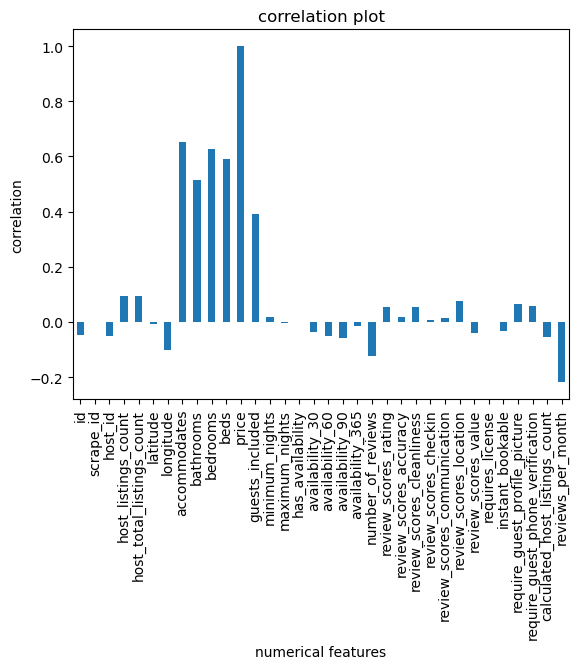

In [ ]:
# A plot of numerical features showing correlation to price
listing_df.corr()['price'].plot(kind = 'bar')
plt.title('correlation plot')
plt.xlabel('numerical features')
plt.ylabel('correlation')

Numerical features showing a strong positive correlation to price are: **Accommodates, Bathrooms, Bedrooms, Beds, Guests_included.** The more of these we have, the higher the price.
> **Surprisingly we see that reviews have very weak negative correlations with price.**
    

In [ ]:
#Drop Columns that are irrelevant to the price modelling
Unneeded_columns = ['id', 'street', 'city', 'state', 'cleaning_fee', 'extra_people', 'calendar_last_scraped','calendar_updated',
                    'neighbourhood', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'zipcode',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'zipcode', 'first_review', 'last_review',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'calculated_host_listings_count', 'jurisdiction_names']

> **Note:** If this dataset involved comparing data for different states or cities then it would have been important to leave the city, state, street columns. But since we are focusing on only the Seattle area, only neighbourhood and neighbourhood group in terms of listing location are important to predict price.

In [ ]:
listing_df.drop(Unneeded_columns, axis = 1, inplace = True)

In [ ]:
listing_df = listing_df[~listing_df.isnull().any(axis=1)]

In [ ]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3140 entries, 0 to 3814
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   neighbourhood_group               3140 non-null   object 
 1   property_type                     3140 non-null   object 
 2   room_type                         3140 non-null   object 
 3   accommodates                      3140 non-null   int64  
 4   bathrooms                         3140 non-null   float64
 5   bedrooms                          3140 non-null   float64
 6   beds                              3140 non-null   float64
 7   bed_type                          3140 non-null   object 
 8   amenities                         3140 non-null   object 
 9   price                             3140 non-null   float64
 10  guests_included                   3140 non-null   int64  
 11  minimum_nights                    3140 non-null   int64  
 12  maximu

In [ ]:
#Use the CountVectorizer feature extractor to obtain amenities from each listings.
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(analyzer = 'word', tokenizer=lambda u:u.strip().split(','))
bag_of_words = count_vectorizer.fit_transform(u)
bag_of_words = pd.DataFrame(bag_of_words.toarray(), index=u.index, columns = count_vectorizer.get_feature_names_out())
bag_of_words

C:\Users\loveo\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,,24-hour_check-in,air_conditioning,breakfast,buzzer/wireless_intercom,cable_tv,carbon_monoxide_detector,cat(s),dog(s),doorman,...,safety_card,shampoo,smoke_detector,smoking_allowed,suitable_for_events,tv,washer,washer_/_dryer,wheelchair_accessible,wireless_internet
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,0,0,0,0,1,0,1,0,0,0,...,1,0,1,0,0,1,1,0,0,1
2,0,0,1,0,0,1,1,1,1,0,...,0,1,1,0,0,1,1,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,1,1,1,0,0,0,1,0,0,1
4,0,0,0,0,0,1,1,0,0,0,...,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,0,0,1,0,0,1,0,0,0,0,...,0,1,1,0,0,1,1,0,1,1
3814,0,1,0,0,0,1,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
3815,0,0,0,1,0,1,0,1,1,0,...,1,0,1,0,0,0,1,0,0,1
3816,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
listing_df_new = listing_df.join(bag_of_words)

In [ ]:
#Drop the amenities feature
listing_df_new.drop('amenities', axis = 1, inplace = True)

In [ ]:
feat_types = listing_df_new.dtypes

In [ ]:
Categorical_typ = feat_types[feat_types == 'object'].index.tolist()

In [ ]:
Categorical_typ

['neighbourhood_group',
 'property_type',
 'room_type',
 'bed_type',
 'cancellation_policy']

In [ ]:
# Get dummy variables for categorical type data
listing_df_final = pd.get_dummies(listing_df_new, columns = Categorical_typ)

In [ ]:
listing_df_final

,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,has_availability,availability_30,...,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,4,1.0,1.0,1.0,85.0,2,1,365,True,14,...,0,0,0,0,0,0,1,0,1,0
1,4,1.0,1.0,1.0,150.0,1,2,90,True,13,...,0,0,0,0,0,0,1,0,0,1
2,11,4.5,5.0,7.0,975.0,10,4,30,True,1,...,0,0,0,0,0,0,1,0,0,1
4,6,2.0,3.0,3.0,450.0,6,1,1125,True,30,...,0,0,0,0,0,0,1,0,0,1
5,2,1.0,1.0,1.0,120.0,1,1,6,True,0,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,5,1.0,2.0,3.0,154.0,4,2,14,True,13,...,0,0,0,0,0,0,1,0,0,1
3811,3,1.0,1.0,1.0,65.0,1,1,1125,True,2,...,0,0,0,0,0,0,1,0,1,0
3812,4,1.0,1.0,2.0,95.0,2,3,365,True,11,...,0,0,0,0,0,0,1,0,1,0
3813,6,2.0,3.0,3.0,359.0,1,3,1125,True,18,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
X = listing_df_final.drop('price',axis = 1)
y = listing_df_final['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
preds = model.predict(X_test)
accuracy = r2_score(y_test, preds)
accuracy

0.5233529377982948

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(n_estimators=200, criterion = 'absolute_error', random_state=42)
rfr.fit(X_train, y_train)

# compute feature importances
importances = rfr.feature_importances_

# rank features by importance score
indices = np.argsort(importances)[::-1]


In [ ]:
preds = rfr.predict(X_test)
r2 = r2_score(y_test, preds)
r2

0.5786104810359058

In [ ]:
imp_feat = indices[:20].tolist()
imp_feat

[2, 100, 24, 1, 0, 11, 12, 13, 6, 5, 10, 4, 9, 73, 8, 79, 69, 36, 3, 18]

In [ ]:
important_features = listing_df_final.iloc[:,imp_feat]
important_features
print('the top 20 features that are most important for price prediction are: ')
print(important_features.columns.tolist())

the top 20 features that are most important for price prediction are: 
['bedrooms', 'property_type_Yurt', 'require_guest_phone_verification', 'bathrooms', 'accommodates', 'availability_90', 'availability_365', 'number_of_reviews', 'minimum_nights', 'guests_included', 'availability_60', 'price', 'availability_30', 'neighbourhood_group_Delridge', 'has_availability', 'neighbourhood_group_Other neighborhoods', 'neighbourhood_group_Beacon Hill', 'dryer', 'beds', 'review_scores_communication']


- The features that are the most important determinant of price are:
    **'bedrooms', 'property_type', 'require_guest_phone_verification', 'bathrooms', 'accommodates', Availability, 'number_of_reviews', 'minimum_nights', 'guests_included', neighbourhood_group, dryer, beds, review_scores_communication**
    
> **We see that these talies with the correlation plot from earlier since we can find the same numerical features from the correlation plot as important features that can predict price**

### CONCLUSION: 

###### 1. Property type trends.
the properties available in seattles airbnb listings are: **'Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Bed & Breakfast',
       'Other', 'Dorm', 'Treehouse', 'Yurt', 'Chalet', 'Tent'**
* **Houses and Apartments** are the most common properties accounting for about 90% of seattles listings. while the **Yurt** is the least common propety types.
- **Boat** listings are the most expensive on the average while the cheapest on average are **Dorms**

###### 2. Neighbourhood trends.
Neighbourhood groups in the seattle area are: 
- The neighbourhood-group with the highest price on the average is the **Magnolia Neighbourhood.** Magnolia is the second largest neighborhood of Seattle, Washington by area (google). This and the fact that it is one of the neighbourhood group with the lowest number of listings (**meaning high brow area, with low units available**) may explain why it is the highest on average.
- The most expensive neighbourhood_groups by average price are: **Magnolia, Queen Anne, Downtown, West_Seattle and Cascade**
- The least expensive neighbourhood_groups on average are: **University District, Lake City, Rainier Valley, Northgate, Delridge**
> 20 Most expensive neighbourhoods in order of decreasing average prices: **'Southeast Magnolia'** (which is in the magnolia Neighbourhood group), **'Portage Bay','Westlake','West Queen Anne','Montlake','Briarcliff','Sunset Hill', 'Industrial District','Alki','Windermere','Pioneer Square','Central Business District','Fauntleroy','Belltown','East Queen Anne','Madrona','Pike-Market','North Queen Anne','Green Lake','Lawton Park'**

###### 3. Busiest times of the year to visit Seattle.

- Listings are **mostly Unavailable** towards the middle of the year around the summer holiday periods (between **June** and **August**). This is most likely due to high demands around these periods.
- The prices of listings on the average have an indirect realtionship with availability. The average prices of listings are therefore (as shown on the chart) higher around the Summer Season(June- August) and tend to be lower after august and before June. The prices also seemed to be on the average higher on the **weekends (Fridays and Saturdays)** and maintain lower prices on **weekdays and sundays**.

- Anyone on a budget during the summer period should consider neighbourhoods like: **Delridge, Northgate, Lake City and Beacon Hill** which have prices under \$120 on average during the summer period compared to Neighbourhood groups like **Downtown, Magnolia, Queen Anne, Cascade** doing a minimum of over \\$150 on average and going as high as \$200 dollars on average in the summer.
> **Note:** We can get Neighbourhoods that go as low as 30dollars in areas like Queen Anne and Downtown and other highbrow areas and get costly listings around low brow neighbourhoods too.

###### 4. Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?
- We see a general upward trend in the number of airbnb listings over the years with occasional dips
 > **Note:** the graph seems to dip in the end but that is only because the data stops on the 3rd day of january 2016.
 
###### 5. The most important Factors that influenc price and can be used to predict price:
- The features that are the most important determinant of price are:
       **'bedrooms', 'property_type', 'require_guest_phone_verification', 'bathrooms', 'accommodates', Availability, 'number_of_reviews', 'minimum_nights', 'guests_included', neighbourhood_group, dryer, beds, review_scores_communication**